# Unsupervies learning with kmean


In [7]:
!pip install scikit-learn

  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 9.0 MB/s eta 0:00:01
   --------------------------- ------------ 7.6/11.1 MB 16.2 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 16.5 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



## Loading data

In [4]:
raw_df = pd.read_csv('force2020_data_unsupervised_learning.csv')

In [6]:
raw_df


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [8]:
raw_df.dropna(inplace=True)

## Transform the data

Standardise the data using the StandardScaler functionf rom Sklearn

To account for variations in measurement units and scale, it is practice prior machine learning to standardise the data.

This is done by taking the feature, the subtracting the mean of that feature fromm the values, and then dividing by the feature's standard deviation.

\[
z = \frac{x - \mu}{\sigma}
\]

\text{where:}
\begin{align*}
x & : \text{The original feature value} \\
\mu & : \text{The mean of the feature} \\
\sigma & : \text{The standard deviation of the feature} \\
z & : \text{The standardized feature value}
\end{align*}

The process can be influenced by outliers (anomalous points) within the data, so it is essential these are identified and dealt with prior to thsi step


In [12]:
raw_df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


In [14]:
scaler = StandardScaler()

We then fit the standard scaler to the data, and then transform out data using that scaler

In [17]:
raw_df[['RHOB_T','NPHI_T','GR_T','PEF_T','DTC_T']] = scaler.fit_transform(raw_df[['RHOB','NPHI','GR','PEF','DTC']])

In [19]:
raw_df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,1.220200e+04,1.220200e+04,1.220200e+04,1.220200e+04,1.220200e+04
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905,-5.217557e-16,-1.490731e-16,7.453653e-17,2.236096e-16,-6.708287e-16
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753,-2.609607e+00,-2.705419e+00,-1.841459e+00,-1.533222e+00,-2.161119e+00
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041,-6.605409e-01,-7.239543e-01,-6.173961e-01,-7.062589e-01,-1.034210e+00
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173,-3.601669e-01,3.758510e-01,5.459496e-02,-3.011687e-01,5.615503e-01
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302,9.535356e-01,7.131280e-01,5.509066e-01,4.260700e-01,8.170400e-01
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797,2.939426e+00,2.770744e+00,1.464037e+01,7.218123e+00,1.398372e+00


# Clustering The Data 

### Identify Optimum Number of Clusters

there a number of ways to identify the optimum number of cluster. The method we are going to look at below is known as the Elbow method.

The Elbow iot allows us to plot the inertia, as well as evaluate the model efficient of out model, we are looking for a point the inertia bregin to slow

In [21]:
def optimise_k_means(data, max_k):
    means = []     # Depena on number of inertia
    inertias = []
    
    for k in range (1, max_k):
        kmeans =  KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
        #Generate the elbow plot
        
    fig = plt.subplots(figsize =(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

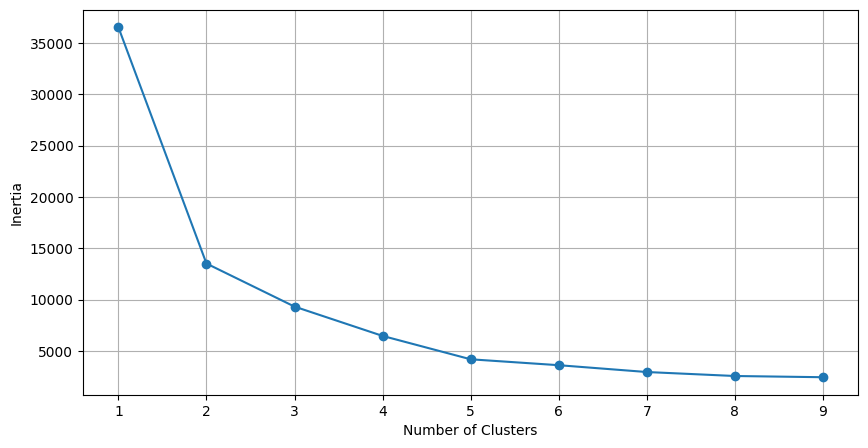

In [60]:
optimise_k_means(raw_df[['RHOB_T','NPHI_T']], 10 )

In [61]:
# Because we can easily see that inertia (sum of the squrae distance to the nearest cluster center ) decrease as we increase the number of cluster. We can see that there a big change in inertia and slope from 2cluster onwards

In [62]:
kmeans = KMeans(n_clusters=3)

In [63]:
kmeans .fit(raw_df[['NPHI_T','RHOB_T']])

KMeans(n_clusters=3)

In [65]:
raw_df['kmeans_3'] = kmeans.labels_

In [66]:
raw_df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_3
0,1.884186,80.200851,494.528,0.404547,20.915468,161.131180,-0.759999,-4.743732e-16,0.571087,7.183187,1.179232e+00,0
1,1.889794,79.262886,494.680,0.404547,19.383013,160.603470,-0.741163,-4.743732e-16,0.538331,6.552420,1.161958e+00,0
2,1.896523,74.821999,494.832,0.404547,22.591518,160.173615,-0.718560,-4.743732e-16,0.383248,7.873059,1.147887e+00,0
3,1.891913,72.878922,494.984,0.404547,32.191910,160.149429,-0.734045,-4.743732e-16,0.315393,11.824636,1.147096e+00,0
4,1.880034,71.729141,495.136,0.404547,38.495632,160.128342,-0.773944,-4.743732e-16,0.275241,14.419285,1.146405e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,3.463851,125.106178,1.745819,-1.852130e+00,-1.551518,0.000000,4.651740e-16,2
18266,2.643114,21.444370,3271.568,0.185574,3.463851,125.106178,1.789158,-1.871240e+00,-1.480786,0.000000,4.651740e-16,2
18267,2.681300,22.646879,3271.720,0.176074,3.463851,125.106178,1.917421,-1.952429e+00,-1.438792,0.000000,4.651740e-16,2
18268,2.738337,22.253584,3271.872,0.174617,3.463851,125.106178,2.109002,-1.964875e+00,-1.452527,0.000000,4.651740e-16,2
